In [0]:
import os
import pandas as pd
import numpy as np
import timeit
import ujson
#Usamos ujson que parece que es el que hace la importación más rápida. Añadir la documentación donde se comenta.
#from google.colab import drive  #Lo pongo más abajo, porque si no me da error (por qué??!!)

#Para conocer el uso de la memoria
import os 
import psutil

In [2]:
!ls -lh

total 4.0K
drwxr-xr-x 2 root root 4.0K Nov 15 19:33 sample_data


##ACCESO A MI DRIVE

In [3]:
#Esto me va a permitir tener acceso a las carpetas de mi drive desde Colab:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/" -lh

total 3.2G
drwx------ 2 root root 4.0K Jul 14 07:08  20180714_Deep_Learning
-rw------- 1 root root  76K Oct 22 18:13  6885.json
drwx------ 2 root root 4.0K Jun 26  2016 'avast! Files (XT1068, UWbYzWPVmAmwlrlD)'
-rw------- 1 root root 2.7M Oct 28 21:03  Cast_Crew_ids.csv
drwx------ 2 root root 4.0K Jul 18 18:38 'Colab Notebooks'
-rw------- 1 root root  44K Feb  4  2018  contacts.vcf
-rw------- 1 root root    1 Apr  9  2018  facturaIVA.gsheet
-rw------- 1 root root  50K Nov  9 13:01  genres.xlsx
-rw------- 1 root root 1.5M Oct 24 17:34  IMDB_5000_movie.csv
-rw------- 1 root root  12K Nov  3 10:33  InflationConverter.xlsx
-rw------- 1 root root    1 Nov 10 10:21 'Mis cuentas.gsheet'
-rw------- 1 root root 117K Oct 28 21:04  Movies_ids.csv
-rw------- 1 root root 2.2M Nov 16 17:17  MoviesUS.csv
-rw------- 1 root root 1.5G Oct 12 15:09  movies.zip
-rw------- 1 root root    1 Nov 17 08:34 'Nuestras Cuentas.gsheet'
-rw------- 1 root root 1.8G Oct 27 13:06  people.zip
-rw------- 1 root root 6.4

##IMPORTACIÓN DESDE GOOGLE DRIVE

In [0]:
#Esto sólo funciona en Google Colab porque tiene una librería de Google Colab.
#Más documentación en:
#https://colab.research.google.com/notebooks/io.ipynb
#en el apartado PyDrive.
#PyDrive documentación:
#https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

In [0]:
#Estos ficheros están en mi google drive.

#moviesUS data
file_id = '1-AHmt1vEuyHO6d-lxg1ygZZ4VuOZmJmm'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("MoviesUS.csv")

In [7]:
!ls -lh

total 2.2M
-rw-r--r-- 1 root root 2.5K Nov 17 09:07 adc.json
drwx------ 3 root root 4.0K Nov 17 09:04 drive
-rw-r--r-- 1 root root 2.2M Nov 17 09:07 MoviesUS.csv
drwxr-xr-x 2 root root 4.0K Nov 15 19:33 sample_data


####IMPORTO LA INFORMACIÓN DE PELÍCULAS Y MIS VARIABLES YA CONSTRUIDAS:

In [8]:
my_file_path='./MoviesUS.csv'

#Reading file and saving in df
dfMoviesUS = pd.read_csv(my_file_path)
dfMoviesUS = dfMoviesUS.drop('movie_id.1', axis=1)
dfMoviesUS.shape

(8373, 69)

In [9]:
dfMoviesUS.head()

,movie_id,revenue_inflation_adjusted,budget_inflation_adjusted,runtime,belongs_to_collection,release_month,intAnnual,3FirstRoles_High,3FirstRoles_Medium,3FirstRoles_Low,...,percentProduction Design_2,percentAnimation_0,percentAnimation_1,percentAnimation_2,percentCostume Design_0,percentCostume Design_1,percentCostume Design_2,percentWriter_0,percentWriter_1,percentWriter_2
0,804,113455200.0,14181900.0,119.0,0,8,3,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,18573,225019480.0,6221126.8,90.0,0,4,3,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,11426,288365300.0,15600090.0,118.0,0,8,3,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,29912,340365600.0,38763860.0,135.0,1,9,3,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,759,113455200.0,NaN,91.0,0,7,3,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
dfMoviesUS.columns

Index(['movie_id', 'revenue_inflation_adjusted', 'budget_inflation_adjusted',
       'runtime', 'belongs_to_collection', 'release_month', 'intAnnual',
       '3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low',
       'OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low',
       'indAnimationMusic', 'indFantasyScienceFiction',
       'indDocumentaryHistoryWar', 'indRomance', 'indComedy',
       'indThrillerHorrorActionCrimeMystery', 'indDrama', 'indLang_ENG',
       'indCountries_US_only', 'indCountries_US_and_oth',
       'indCountries_Eur_only', 'indCountries_Other', 'indCertific_G_PG',
       'indCertific_PG13', 'indCertific_R_NC17', 'indGenreNull',
       'indCountryNull', 'percentProducer_0', 'percentProducer_1',
       'percentProducer_2', 'percentExecutive Producer_0',
       'percentExecutive Producer_1', 'percentExecutive Producer_2',
       'percentDirector_0', 'percentDirector_1', 'percentDirector_2',
       'percentEditor_0', 'percentEditor_1', 'percentEditor_2',

In [11]:
#CUIDADO: RELEASE_MONTH ES UN ENTERO. SI LO USO TENDRÉ QUE PONERLO COMO STRING.
dfMoviesUS.dtypes

movie_id                                 int64
revenue_inflation_adjusted             float64
budget_inflation_adjusted              float64
runtime                                float64
belongs_to_collection                    int64
release_month                            int64
intAnnual                                int64
3FirstRoles_High                       float64
3FirstRoles_Medium                     float64
3FirstRoles_Low                        float64
OtherRoles_High                        float64
OtherRoles_Medium                      float64
OtherRoles_Low                         float64
indAnimationMusic                        int64
indFantasyScienceFiction                 int64
indDocumentaryHistoryWar                 int64
indRomance                               int64
indComedy                                int64
indThrillerHorrorActionCrimeMystery      int64
indDrama                                 int64
indLang_ENG                              int64
indCountries_

###MI MODELO:

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

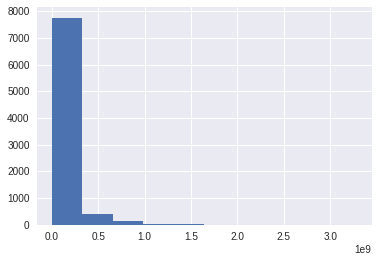

In [13]:
plt.hist(dfMoviesUS['revenue_inflation_adjusted']);

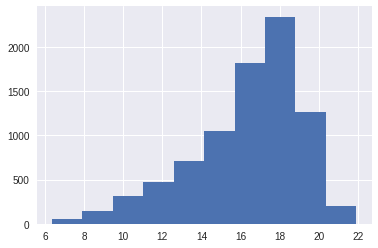

In [14]:
plt.hist(dfMoviesUS['revenue_inflation_adjusted'].map(lambda x: np.log(x)));

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


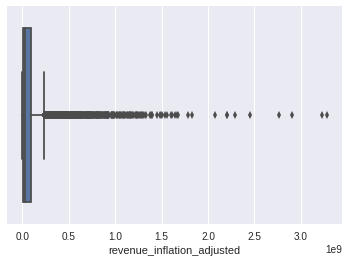

In [15]:
sns.boxplot(dfMoviesUS['revenue_inflation_adjusted']);
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


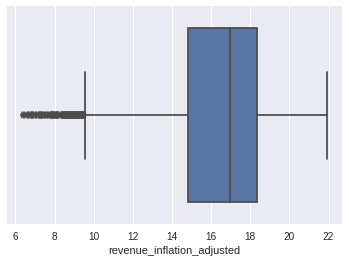

In [16]:
sns.boxplot(dfMoviesUS['revenue_inflation_adjusted'].map(lambda x: np.log(x)));
plt.show()

####Revisión gráfica:

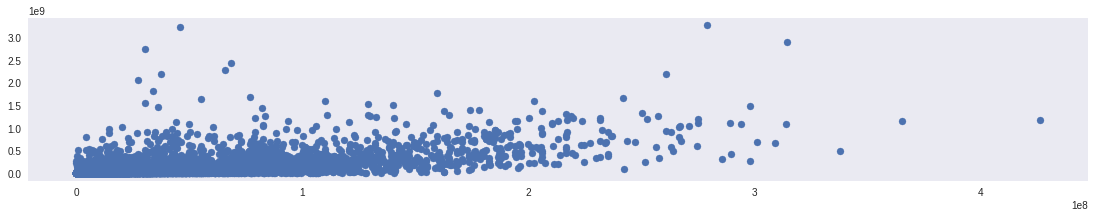

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1,1)

plt.scatter(dfMoviesUS[dfMoviesUS['budget_inflation_adjusted'].notnull()]['budget_inflation_adjusted'], dfMoviesUS[dfMoviesUS['budget_inflation_adjusted']>0]['revenue_inflation_adjusted'])
plt.grid(False)

plt.title('')
plt.ylabel('')

figure.set_size_inches([19,3])

plt.show()

In [19]:
myFeaturesList = ['budget_inflation_adjusted', 'runtime', 'belongs_to_collection', 'release_month', 'intAnnual'] + dfMoviesUS.columns[dfMoviesUS.columns.str.contains('Roles')].tolist() + dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('ind')].tolist() + dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('percent')].tolist()
myFeaturesList.remove('indDrama')
myFeaturesList.remove('indCountries_Other')
myFeaturesList.remove('indCountryNull')
myFeaturesList.remove('indGenreNull')
myFeaturesList.remove('release_month')
myFeaturesList.remove('belongs_to_collection')
myFeaturesList = list(set(myFeaturesList) - set(dfMoviesUS.columns[(dfMoviesUS.columns.str.startswith('percent')) & (dfMoviesUS.columns.str.contains('_2'))].tolist()))
myFeaturesList.sort()

len(myFeaturesList)

48

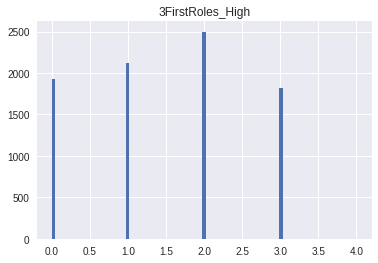

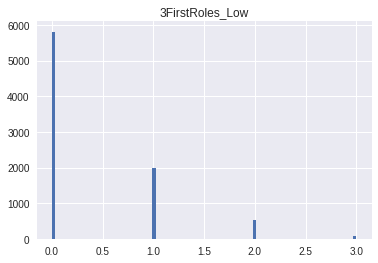

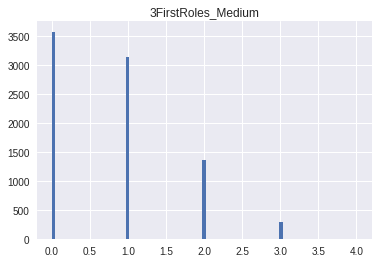

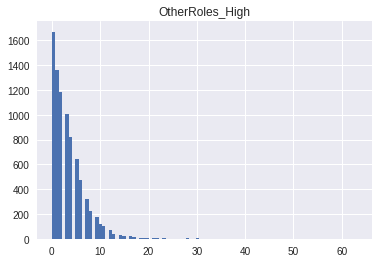

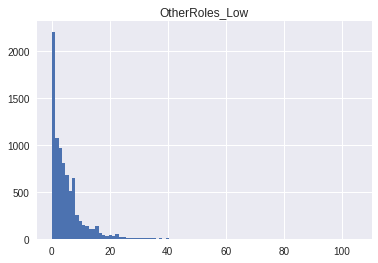

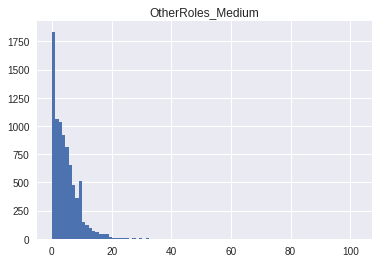

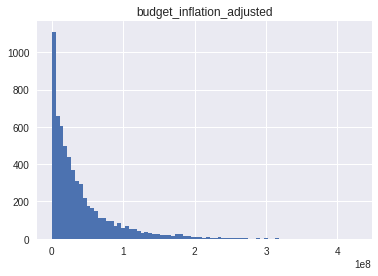

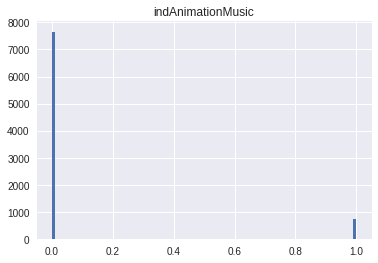

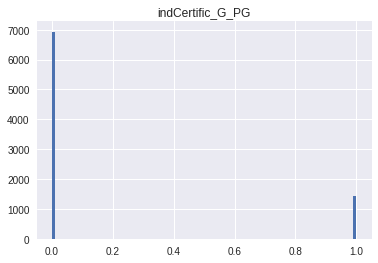

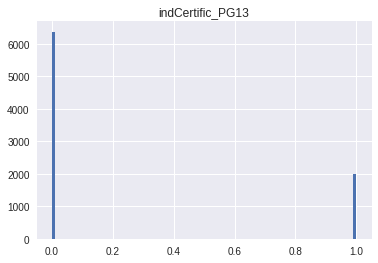

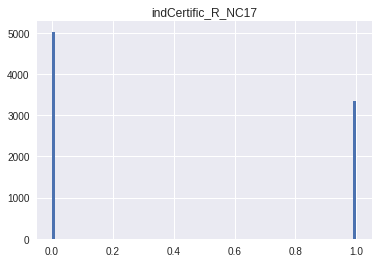

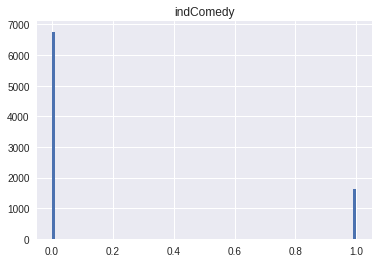

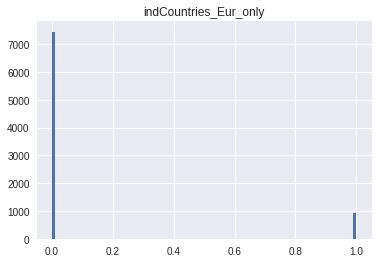

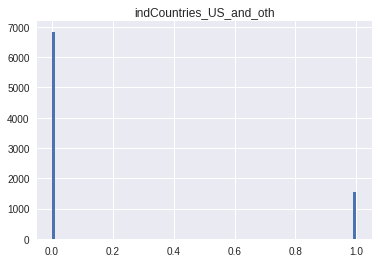

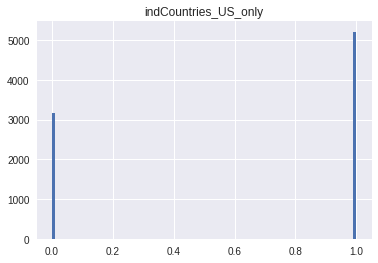

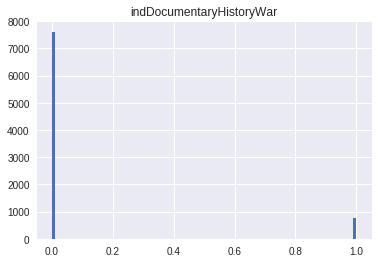

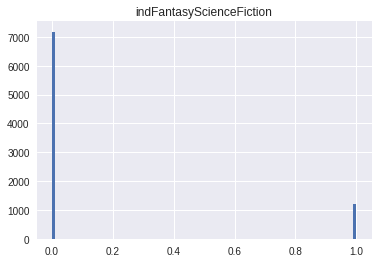

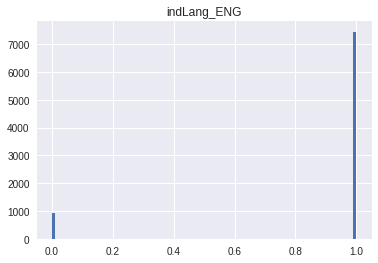

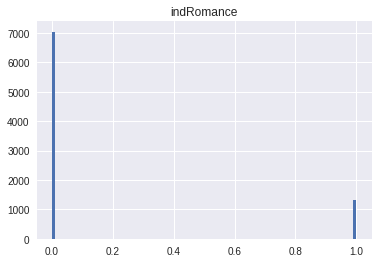

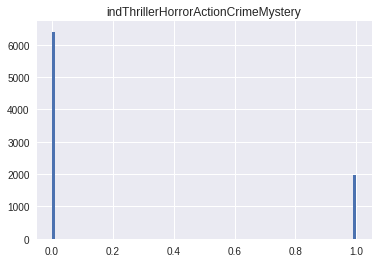

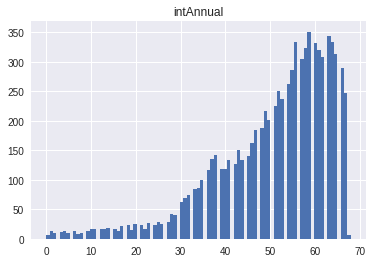

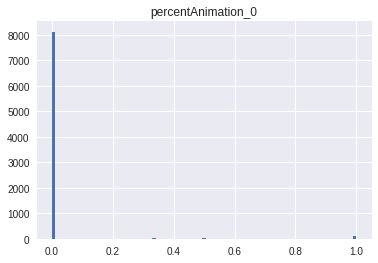

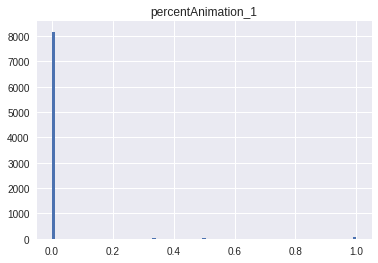

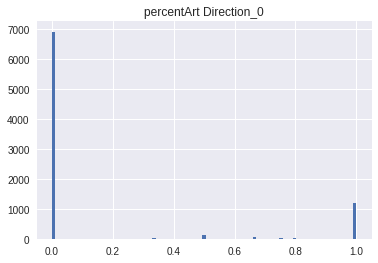

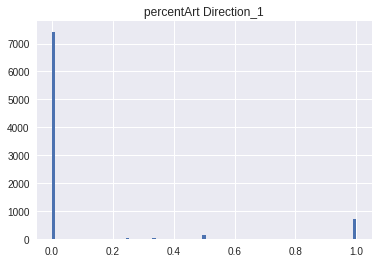

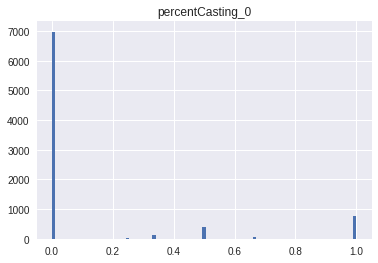

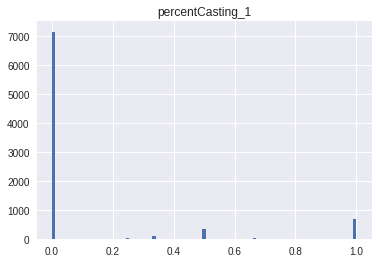

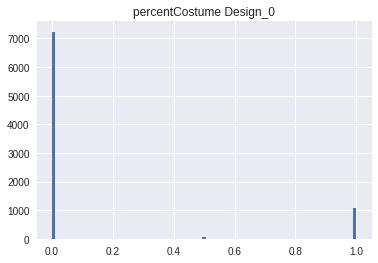

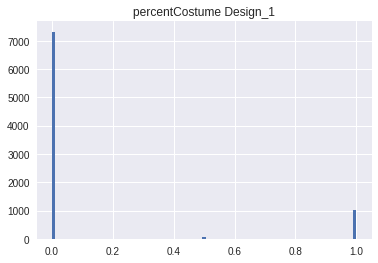

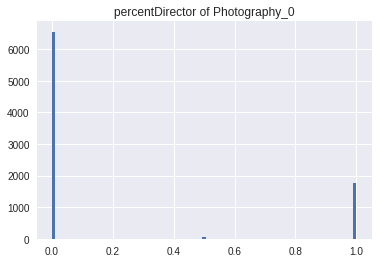

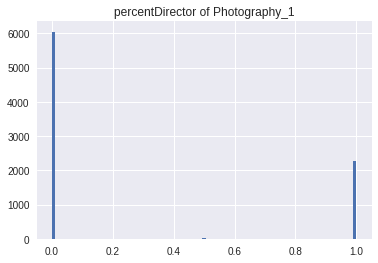

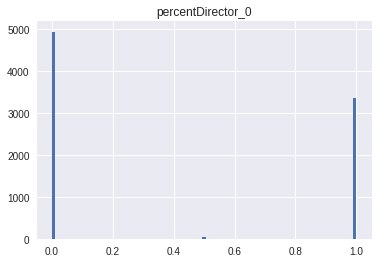

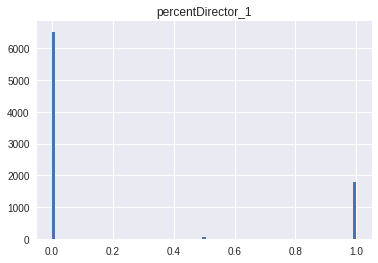

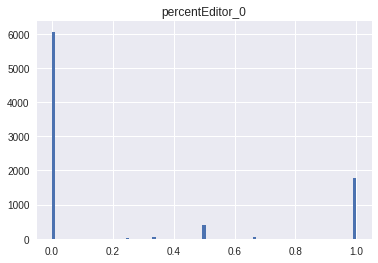

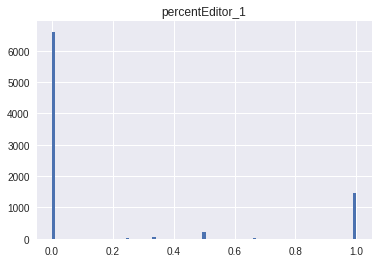

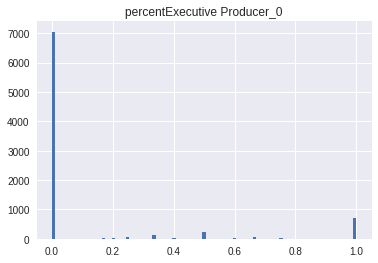

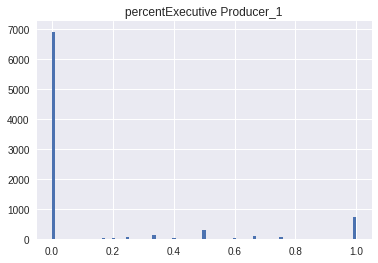

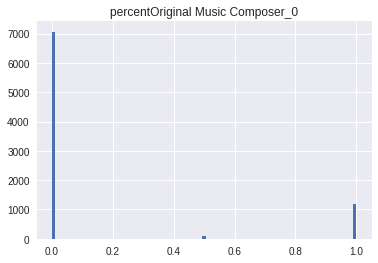

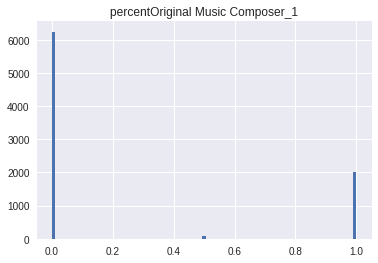

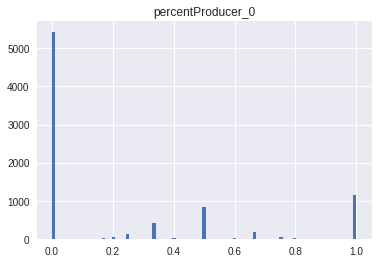

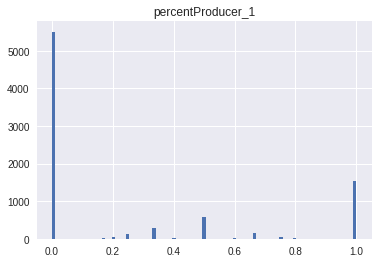

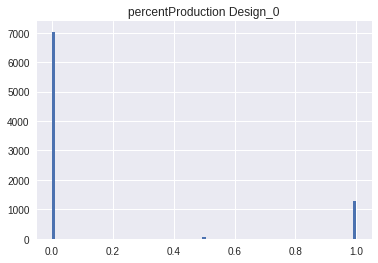

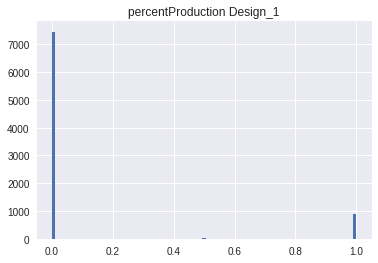

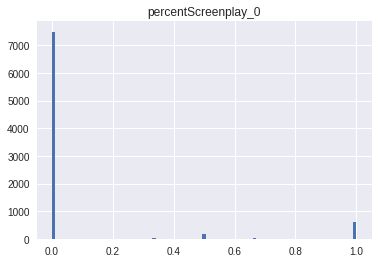

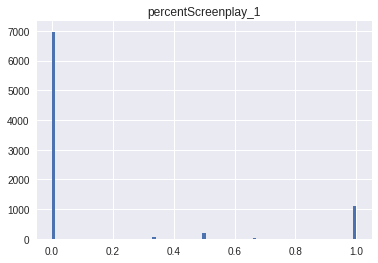

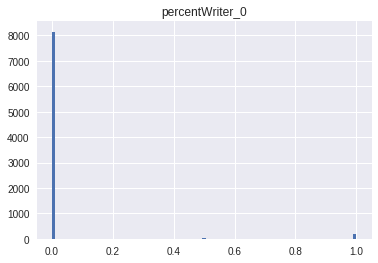

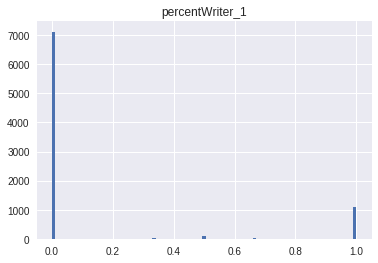

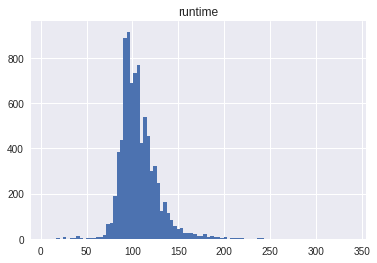

In [20]:
for col in myFeaturesList:
    plt.title(col)
    num_bins = int(np.sqrt(dfMoviesUS[col].notnull().sum()))
    plt.hist(dfMoviesUS[col].dropna().values,bins=num_bins)
    plt.show()

####Modelizando:

In [0]:
#DE MOMENTO VOY A EXCLUIR LOS NULOS EN LAS VARIABLES QUE LOS TIENEN (budget y runtime). Y VOY A EXCLUIR LA ÚNICA VARIABLE CATEGÓRICOA (MONTH)

In [21]:
myFeaturesList = ['budget_inflation_adjusted', 'runtime', 'belongs_to_collection', 'release_month', 'intAnnual'] + dfMoviesUS.columns[dfMoviesUS.columns.str.contains('Roles')].tolist() + dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('ind')].tolist() + dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('percent')].tolist()
myFeaturesList.remove('indDrama')
myFeaturesList.remove('indCountries_Other')
myFeaturesList.remove('indCountryNull')
myFeaturesList.remove('indGenreNull')
myFeaturesList.remove('release_month')
myFeaturesList.remove('belongs_to_collection')
myFeaturesList = list(set(myFeaturesList) - set(dfMoviesUS.columns[(dfMoviesUS.columns.str.startswith('percent')) & (dfMoviesUS.columns.str.contains('_2'))].tolist()))
myFeaturesList.sort()

len(myFeaturesList)

48

In [0]:
X=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][myFeaturesList]
y=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][['revenue_inflation_adjusted']].applymap(lambda x: np.log(x)).values.ravel()

In [0]:
#FILTRANDO dfMoviesUS['budget_inflation_adjusted']<3e8. No cambia mucho!! Bien. Veo que los que están por encima no parecen errores.

#X=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['budget_inflation_adjusted']<3e8) & (dfMoviesUS['runtime'].notnull())][myFeaturesList]
#y=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['budget_inflation_adjusted']<3e8) & (dfMoviesUS['runtime'].notnull())][['revenue_inflation_adjusted']].applymap(lambda x: np.log(x))

In [0]:
#Cambié el peso de test del 25% al 30% (en algún caso me estaba saliendo la métrica de test más alta que la de train). Asi se arregló.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [25]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
from sklearn.pipeline import make_union, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

In [0]:
#Me falta por incluir el release_month
def get_not_log_cols(df):
    return df[['3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low', 'intAnnual', 'runtime'] + df.columns[df.columns.str.startswith('ind')].tolist() + df.columns[df.columns.str.startswith('percent')].tolist()]

def get_log_cols(df):
    return df[['budget_inflation_adjusted', 'OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low']]
    #return df[['budget_inflation_adjusted']]
  
def log_1(df):
    return df.applymap(lambda x: np.log(x+1))

#def log_1(my_array):
#    return np.array(list(map(lambda x : np.log(x+1), my_array)))

In [0]:
model_1 = Pipeline(steps=[
    ('union', make_union(
    FunctionTransformer(get_not_log_cols, validate=False), 
    Pipeline(steps=[('get_log_cols', FunctionTransformer(get_log_cols, validate=False)), 
                    ('log_x_plus_1', FunctionTransformer(log_1, validate=False))])
    )), 
    ('linear_regression', RidgeCV())
                   ])   

model_2 = Pipeline(steps=[
    ('log', 
    Pipeline(steps=[('get_log_cols', FunctionTransformer(get_log_cols, validate=False)), 
                    ('log_x_plus_1', FunctionTransformer(log_1, validate=False))])
    ), 
    ('linear_regression', LinearRegression())
                   ])   

model_3 = Pipeline(steps=[
    ('get_not_log-cols', 
    FunctionTransformer(get_not_log_cols, validate=False)), 
    ('linear_regression', LinearRegression())
                   ])   

In [0]:
#FILTARNDO dfMoviesUS['budget_inflation_adjusted']<3e8
#R2=45 (sólo con budget-log), 23(sólo con los 3 campos de others-log), 49 con ambos (algo mayor en test que en train!!)
#Todas las variables no log dan un 52% (muy similar en train y test)
#Todas las variables dan un 59% (muy similar en train y test)

In [31]:
model_1.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_not_log_cols at 0x7f2982ca68c8>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=False))...None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False))])

In [32]:
from sklearn.metrics import r2_score

print(r2_score(y_train,model_1.predict(X_train)))
print(r2_score(y_test,model_1.predict(X_test)))

0.5526061193619106
0.5480980073107795


In [0]:
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [34]:
import math
print(math.sqrt(mean_squared_error(y_train,model_1.predict(X_train))))
print(math.sqrt(mean_squared_error(y_test,model_1.predict(X_test))))

1.6666876623357147
1.6793634111611642


In [35]:
mean_absolute_percentage_error(y_test,model_1.predict(X_test))

8.209106508226714

In [36]:
# The coefficients
pd.Series(model_1.named_steps['linear_regression'].coef_, index=X.columns).sort_index()

3FirstRoles_High                      -0.176662
3FirstRoles_Low                       -0.163661
3FirstRoles_Medium                    -0.088734
OtherRoles_High                       -0.034764
OtherRoles_Low                         0.008865
OtherRoles_Medium                      0.613641
budget_inflation_adjusted              1.165877
indAnimationMusic                      1.084563
indCertific_G_PG                       0.603929
indCertific_PG13                       0.384276
indCertific_R_NC17                    -0.224453
indComedy                              0.115314
indCountries_Eur_only                  0.301797
indCountries_US_and_oth                0.043749
indCountries_US_only                   0.341515
indDocumentaryHistoryWar              -0.623984
indFantasyScienceFiction               0.400942
indLang_ENG                            0.475950
indRomance                             0.577224
indThrillerHorrorActionCrimeMystery    0.562086
intAnnual                              0

In [37]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, model_1.predict(X_test)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, model_1.predict(X_test)))

Mean squared error: 2.82
Variance score: 0.55


In [0]:
#from sklearn.model_selection import cross_val_score
#cross_val_score(model_1, X, y, cv=10)

In [0]:
#cross_val_score(model_1, X, y, cv=10).mean()

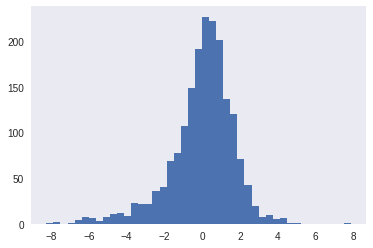

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1,1)

num_bins = int(np.sqrt(len(y_test)))
plt.hist(y_test - model_1.predict(X_test), bins=num_bins);

plt.grid(False)

plt.title('')
plt.ylabel('')

figure.set_size_inches([6,4])

plt.show()

In [41]:
pd.Series(y_test - model_1.predict(X_test)).describe()

count    1871.000000
mean       -0.005423
std         1.679804
min        -8.251351
25%        -0.729368
50%         0.212390
75%         1.015473
max         7.849468
dtype: float64

####VOY A PROBAR UN MODELO ROBUSTO:

In [0]:
from sklearn.linear_model import RANSACRegressor

In [0]:
model_4 = Pipeline(steps=[
    ('union', make_union(
    FunctionTransformer(get_not_log_cols, validate=False), 
    Pipeline(steps=[('get_log_cols', FunctionTransformer(get_log_cols, validate=False)), 
                    ('log_x_plus_1', FunctionTransformer(log_1, validate=False))])
    )), 
    ('linear_regression', RANSACRegressor())
                   ])   

In [44]:
model_4.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_not_log_cols at 0x7f2982ca68c8>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=False))...       residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf))])

In [45]:
print(math.sqrt(mean_squared_error(y_train,model_4.predict(X_train))))
print(math.sqrt(mean_squared_error(y_test,model_4.predict(X_test))))

2.9257788387044488
2.9140434978613126


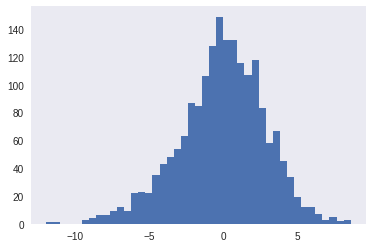

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1,1)

num_bins = int(np.sqrt(len(y_test)))
plt.hist(y_test - model_4.predict(X_test), bins=num_bins);

plt.grid(False)
plt.title('')
plt.ylabel('')
figure.set_size_inches([6,4])

plt.show()

In [47]:
pd.Series(y_test - model_4.predict(X_test)).describe()

count    1871.000000
mean       -0.069741
std         2.913988
min       -11.977364
25%        -1.832745
50%         0.073308
75%         1.913896
max         8.626597
dtype: float64

####Otro:

In [0]:
X=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][myFeaturesList]
y=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][['revenue_inflation_adjusted']].values.ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [0]:
model_5 = RANSACRegressor()

In [50]:
model_5.fit(X_train,y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [51]:
print(math.sqrt(mean_squared_error(y_train,model_5.predict(X_train))))
print(math.sqrt(mean_squared_error(y_test,model_5.predict(X_test))))

275386639.4414784
255065975.3932105


####Lasso:

In [176]:
myFeaturesList = ['budget_inflation_adjusted', 'runtime', 'belongs_to_collection', 'release_month', 'intAnnual'] + dfMoviesUS.columns[dfMoviesUS.columns.str.contains('Roles')].tolist() + dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('ind')].tolist() + dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('percent')].tolist()
myFeaturesList.remove('indDrama')
myFeaturesList.remove('indCountries_Other')
myFeaturesList.remove('indCountryNull')
myFeaturesList.remove('indGenreNull')
myFeaturesList.remove('release_month')
myFeaturesList.remove('belongs_to_collection')
myFeaturesList = list(set(myFeaturesList) - set(dfMoviesUS.columns[(dfMoviesUS.columns.str.startswith('percent')) & (dfMoviesUS.columns.str.contains('_2'))].tolist()))
myFeaturesList.sort()

len(myFeaturesList)

48

In [0]:
X=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][myFeaturesList]
y=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][['revenue_inflation_adjusted']].applymap(lambda x: np.log(x)).values.ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [0]:
#Me falta por incluir el release_month
def get_not_log_cols(df):
    return df[['3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low', 'intAnnual', 'runtime'] + df.columns[df.columns.str.startswith('ind')].tolist() + df.columns[df.columns.str.startswith('percent')].tolist()]

def get_log_cols(df):
    return df[['budget_inflation_adjusted', 'OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low']]
    #return df[['budget_inflation_adjusted']]
  
def log_1(df):
    return df.applymap(lambda x: np.log(x+1))

In [0]:
from sklearn.linear_model import LassoCV, lasso_path, Lasso, LassoLarsCV, LassoLars

In [0]:
model_6 = Pipeline(steps=[
    ('union', make_union(
    FunctionTransformer(get_not_log_cols, validate=False), 
    Pipeline(steps=[('get_log_cols', FunctionTransformer(get_log_cols, validate=False)), 
                    ('log_x_plus_1', FunctionTransformer(log_1, validate=False))])
    )), 
    ('lasso', LassoCV(cv=3, alphas= np.linspace(0.0001,1,2000), max_iter=5000, random_state=42))
                   ])   

#model_6 = LassoCV(cv=10, random_state=42).fit(X_train, y_train)
#('lasso', LassoCV(cv=3, random_state=42)
#('lasso', LassoLarsCV(cv=3)

In [201]:
model_6.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_not_log_cols at 0x7f297d5ef048>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=False))...=False,
    precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
    verbose=False))])

In [202]:
coefficients = pd.Series(model_6.named_steps['lasso'].coef_, index=X.columns).sort_index()
coefficients[coefficients != 0]

3FirstRoles_High                      -0.163451
3FirstRoles_Low                       -0.150930
3FirstRoles_Medium                    -0.073207
OtherRoles_High                       -0.034674
OtherRoles_Low                         0.008758
OtherRoles_Medium                      0.568059
budget_inflation_adjusted              1.193266
indAnimationMusic                      1.110549
indCertific_G_PG                       0.622926
indCertific_PG13                       0.337685
indCertific_R_NC17                    -0.234481
indComedy                              0.075695
indCountries_Eur_only                  0.264890
indCountries_US_only                   0.292891
indDocumentaryHistoryWar              -0.597719
indFantasyScienceFiction               0.351328
indLang_ENG                            0.432696
indRomance                             0.569186
indThrillerHorrorActionCrimeMystery    0.551221
intAnnual                              0.286008
percentAnimation_0                     0

In [203]:
coefficients[coefficients != 0].shape

(45,)

In [204]:
print(math.sqrt(mean_squared_error(y_train,model_6.predict(X_train))))
print(math.sqrt(mean_squared_error(y_test,model_6.predict(X_test))))
print("\n")
print(r2_score(y_train,model_6.predict(X_train)))
print(r2_score(y_test,model_6.predict(X_test)))

1.6670522297223693
1.67968241203629


0.5524103741599944
0.5479263103192252


In [205]:
myAlpha = model_6.named_steps['lasso'].alpha_
myAlpha

0.0016006003001500751

In [206]:
myAlphas = model_6.named_steps['lasso'].alphas_
len(myAlphas)

2000

In [207]:
myAlphas[0:10]

array([1.       , 0.9994998, 0.9989996, 0.9984994, 0.9979992, 0.997499 ,
       0.9969988, 0.9964986, 0.9959984, 0.9954982])

In [208]:
myAlphas[-10:]

array([0.0046018, 0.0041016, 0.0036014, 0.0031012, 0.002601 , 0.0021008,
       0.0016006, 0.0011004, 0.0006002, 0.0001   ])

In [209]:
list(myAlphas==myAlpha)[-5:]

[False, True, False, False, False]

In [0]:
myTransformations = Pipeline(steps=[
    ('union', make_union(
    FunctionTransformer(get_not_log_cols, validate=False), 
    Pipeline(steps=[('get_log_cols', FunctionTransformer(get_log_cols, validate=False)), 
                    ('log_x_plus_1', FunctionTransformer(log_1, validate=False))])
    ))
                   ])   

In [211]:
X_train_transformed = myTransformations.fit_transform(X_train)
print(type(X_train))
print(X_train.shape)
print(type(X_train_transformed.shape))
print(X_train_transformed.shape)

<class 'pandas.core.frame.DataFrame'>
(4364, 48)
<class 'tuple'>
(4364, 48)


In [0]:
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_transformed, y_train, alphas=myAlphas)
#alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=myAlphas)

In [213]:
sum(alphas_lasso != myAlphas)

0

In [214]:
coefs_lasso.shape

(48, 2000)

In [215]:
model_6.named_steps['lasso'].coef_

array([-0.1634506 , -0.15093042, -0.07320735, -0.03467443,  0.0087582 ,
        0.56805913,  1.19326615,  1.1105493 ,  0.62292592,  0.33768461,
       -0.23448119,  0.07569514,  0.26488969,  0.        ,  0.29289075,
       -0.59771877,  0.35132771,  0.43269599,  0.56918558,  0.55122099,
        0.28600794,  0.05161967,  0.07950979, -0.1388012 ,  0.03018512,
       -0.05662639,  0.08611934,  0.19437254,  0.1429633 , -0.01347244,
        0.03515925, -0.01186695,  0.05266207,  0.33784078,  0.2173166 ,
        0.40058078,  0.15089898, -0.02928015, -0.        , -0.2113173 ,
        0.        , -0.03381378,  0.17340546, -0.13352471,  0.65278761,
        0.02653867,  0.12711753,  0.34308989])

In [216]:
len(coefs_lasso)

48

In [217]:
coefs_lasso

array([[-0.        , -0.        , -0.        , ..., -0.1970545 ,
        -0.20302258, -0.20897477],
       [ 0.        ,  0.        ,  0.        , ..., -0.12934856,
        -0.13587705, -0.14238863],
       [ 0.        ,  0.        ,  0.        , ..., -0.02378769,
        -0.03135227, -0.03890047],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.10169652,
        -0.10520646, -0.1087196 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.09684378,
         0.09810701,  0.09937173],
       [ 0.        ,  0.        ,  0.        , ...,  0.30765064,
         0.30653826,  0.30542703]])

In [218]:
coefs_lasso[:,5]

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.00048728e-04,
        2.08608114e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        8.79254801e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [199]:
X_train.columns

Index(['3FirstRoles_High', '3FirstRoles_Low', '3FirstRoles_Medium',
       'OtherRoles_High', 'OtherRoles_Low', 'OtherRoles_Medium',
       'budget_inflation_adjusted', 'indAnimationMusic', 'indCertific_G_PG',
       'indCertific_PG13', 'indCertific_R_NC17', 'indComedy',
       'indCountries_Eur_only', 'indCountries_US_and_oth',
       'indCountries_US_only', 'indDocumentaryHistoryWar',
       'indFantasyScienceFiction', 'indLang_ENG', 'indRomance',
       'indThrillerHorrorActionCrimeMystery', 'intAnnual',
       'percentAnimation_0', 'percentAnimation_1', 'percentArt Direction_0',
       'percentArt Direction_1', 'percentCasting_0', 'percentCasting_1',
       'percentCostume Design_0', 'percentCostume Design_1',
       'percentDirector of Photography_0', 'percentDirector of Photography_1',
       'percentDirector_0', 'percentDirector_1', 'percentEditor_0',
       'percentEditor_1', 'percentExecutive Producer_0',
       'percentExecutive Producer_1', 'percentOriginal Music Composer_0'

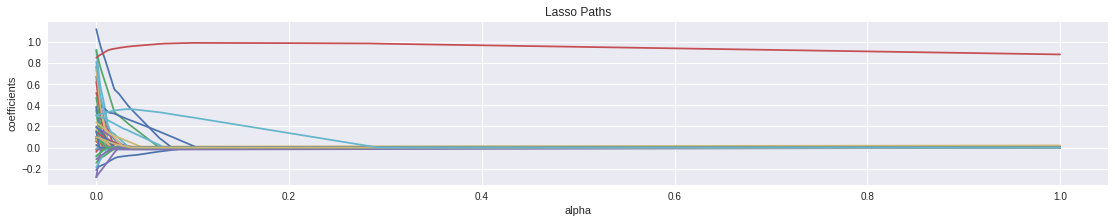

In [149]:
figure, axes = plt.subplots(1,1)

#plt.figure(1)

for coef_l in coefs_lasso:
    l1 = plt.plot(alphas_lasso, coef_l)

#plt.xlabel('-Log(alpha)')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso Paths')
plt.axis('tight')
figure.set_size_inches([19,3])

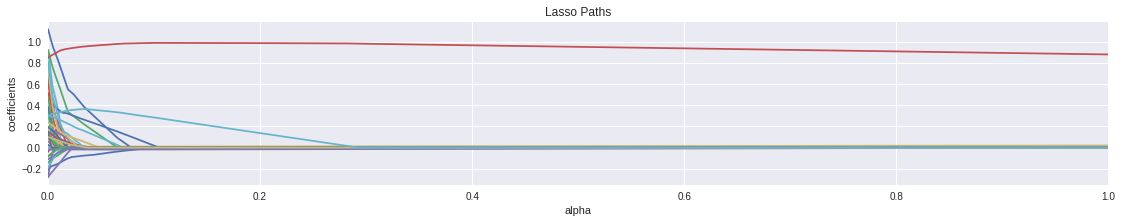

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1,1)

#plt.figure(1)
for coef_l in coefs_lasso:
    l1 = plt.plot(alphas_lasso, coef_l)

#plt.xlabel('-Log(alpha)')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso Paths')
plt.axis('tight')
plt.xlim(0,1)
figure.set_size_inches([19,3])

In [151]:
myAlphas

array([1.00000000e+00, 9.99499750e-01, 9.98999500e-01, ...,
       1.00050025e-03, 5.00250125e-04, 0.00000000e+00])

In [0]:
model_6bis = Pipeline(steps=[
    ('union', make_union(
    FunctionTransformer(get_not_log_cols, validate=False), 
    Pipeline(steps=[('get_log_cols', FunctionTransformer(get_log_cols, validate=False)), 
                    ('log_x_plus_1', FunctionTransformer(log_1, validate=False))])
    )), 
    ('lasso', LassoLars(alpha=0.01))
                   ])   

#('lasso', Lasso(alpha=5, random_state=42)

In [0]:
model_6bis.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_not_log_cols at 0x7f2261b48510>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=False))...it_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False))])

In [0]:
coefficients = pd.Series(model_6bis.named_steps['lasso'].coef_, index=X.columns).sort_index()
coefficients[coefficients != 0]

percentScreenplay_1    0.591068
dtype: float64

In [0]:
coefficients[coefficients != 0].shape

(1,)

In [0]:
print(math.sqrt(mean_squared_error(y_train,model_6bis.predict(X_train))))
print(math.sqrt(mean_squared_error(y_test,model_6bis.predict(X_test))))
print("\n")
print(r2_score(y_train,model_6bis.predict(X_train)))
print(r2_score(y_test,model_6bis.predict(X_test)))

2.409711714145354
2.41604103195903


0.0647843274672314
0.06467295082566982


In [0]:
#Hago un modelo sólo con budget:

In [0]:
X=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][['budget_inflation_adjusted']].applymap(lambda x: np.log(x))
y=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][['revenue_inflation_adjusted']].applymap(lambda x: np.log(x)).values.ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [0]:
model_8 = LinearRegression()
model_8.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
print(math.sqrt(mean_squared_error(y_train,model_8.predict(X_train))))
print(math.sqrt(mean_squared_error(y_test,model_8.predict(X_test))))
print("\n")
print(r2_score(y_train,model_8.predict(X_train)))
print(r2_score(y_test,model_8.predict(X_test)))

1.8469576013485713
1.8696040194713095


0.4505914036938429
0.4399147328361246


In [0]:
#Hago un modelo sólo con OtherRoles_Medium:

In [0]:
X=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][['percentScreenplay_1']]
y=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][['revenue_inflation_adjusted']].applymap(lambda x: np.log(x)).values.ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [0]:
model_9 = LinearRegression()
model_9.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
print(math.sqrt(mean_squared_error(y_train,model_9.predict(X_train))))
print(math.sqrt(mean_squared_error(y_test,model_9.predict(X_test))))
print("\n")
print(r2_score(y_train,model_9.predict(X_train)))
print(r2_score(y_test,model_9.predict(X_test)))

2.4914634298826868
2.4986219214301575


0.00025179673860031837
-0.00035920907371944644


In [0]:
#print(type(model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)))
#print(len(model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)))
#print(type(model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)[0]))
#print(len(model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)[0]))
#print(type(model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)[1]))
#print(len(model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)[1]))
#print(model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)[1].shape)
#print(type(model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)[2]))
#print(len(model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)[2]))

In [0]:
#sum(model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)[0] == myAlphas)

In [0]:
#model_6.named_steps['lasso'].path(X_train_transformed, y_train, alphas=myAlphas)[1][:,95]

####Ridge sin budget:

In [220]:
myFeaturesList = ['budget_inflation_adjusted', 'runtime', 'belongs_to_collection', 'release_month', 'intAnnual'] + dfMoviesUS.columns[dfMoviesUS.columns.str.contains('Roles')].tolist() + dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('ind')].tolist() + dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('percent')].tolist()
myFeaturesList.remove('indDrama')
myFeaturesList.remove('indCountries_Other')
myFeaturesList.remove('indCountryNull')
myFeaturesList.remove('indGenreNull')
myFeaturesList.remove('release_month')
myFeaturesList.remove('budget_inflation_adjusted')
myFeaturesList.remove('belongs_to_collection')
myFeaturesList = list(set(myFeaturesList) - set(dfMoviesUS.columns[(dfMoviesUS.columns.str.startswith('percent')) & (dfMoviesUS.columns.str.contains('_2'))].tolist()))
myFeaturesList.sort()

len(myFeaturesList)

47

In [0]:
X=dfMoviesUS[(dfMoviesUS['runtime'].notnull())][myFeaturesList]
y=dfMoviesUS[(dfMoviesUS['runtime'].notnull())][['revenue_inflation_adjusted']].applymap(lambda x: np.log(x)).values.ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [0]:
#Me falta por incluir el release_month
def get_not_log_cols(df):
    return df[['3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low', 'intAnnual', 'runtime'] + df.columns[df.columns.str.startswith('ind')].tolist() + df.columns[df.columns.str.startswith('percent')].tolist()]

def get_log_cols(df):
    return df[['OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low']]
    #return df[['budget_inflation_adjusted']]
  
def log_1(df):
    return df.applymap(lambda x: np.log(x+1))

In [0]:
model_7 = Pipeline(steps=[
    ('union', make_union(
    FunctionTransformer(get_not_log_cols, validate=False), 
    Pipeline(steps=[('get_log_cols', FunctionTransformer(get_log_cols, validate=False)), 
                    ('log_x_plus_1', FunctionTransformer(log_1, validate=False))])
    )), 
    ('lasso', RidgeCV())
                   ]) 

In [224]:
model_7.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_not_log_cols at 0x7f297d5efd90>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=False))...None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False))])

In [225]:
coefficients = pd.Series(model_7.named_steps['lasso'].coef_, index=X.columns).sort_index()
coefficients[coefficients != 0]

3FirstRoles_High                       0.211419
3FirstRoles_Low                        0.188548
3FirstRoles_Medium                     0.226538
OtherRoles_High                       -0.055361
OtherRoles_Low                         0.018607
OtherRoles_Medium                      1.317333
indAnimationMusic                      1.927455
indCertific_G_PG                       1.807191
indCertific_PG13                       1.036709
indCertific_R_NC17                     0.670888
indComedy                             -0.337622
indCountries_Eur_only                  0.310366
indCountries_US_and_oth                0.295601
indCountries_US_only                   0.306461
indDocumentaryHistoryWar               0.880704
indFantasyScienceFiction              -0.888713
indLang_ENG                            0.581444
indRomance                             0.695345
indThrillerHorrorActionCrimeMystery    1.242539
intAnnual                              1.327568
percentAnimation_0                     0

In [226]:
len(coefficients[coefficients != 0])

47

In [227]:
print(math.sqrt(mean_squared_error(y_train,model_7.predict(X_train))))
print(math.sqrt(mean_squared_error(y_test,model_7.predict(X_test))))
print("\n")
print(r2_score(y_train,model_7.predict(X_train)))
print(r2_score(y_test,model_7.predict(X_test)))

1.9737250973546208
2.03430148712486


0.49695882440251893
0.47562739706869794


In [228]:
dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())].shape

(6235, 69)